In [1]:
# practice for corpus workshop
# Jeremy Fahringer
#
#  based on Summer School of Linguistics 2016 - python for linguists workshops
#  https://github.com/dlukes/ssol/blob/master/notebooks/day4.ipynb

In [2]:
import nltk
# this imports the `regex` library and renames it to `re` for convenience
# (it's less typing)
import regex as re

%matplotlib notebook


In [3]:
import IPython.core.display as ipd
import ipywidgets as ipw

@ipw.interact(regex=ipw.Text(), string=ipw.Textarea())
def findall(DOTALL=False, MULTILINE=False, IGNORECASE=False, only_first=False, regex="", string=""):
    if not (regex and string):
        ipd.display(ipd.HTML(""))
        return None
    flags = 0
    if DOTALL:
        flags |= re.DOTALL
    if MULTILINE:
        flags |= re.MULTILINE
    if IGNORECASE:
        flags |= re.IGNORECASE
    start = '<span style="background-color: gold">'
    end = "</span>"
    offset_bump = len(start) + len(end)
    offset = 0
    html = string
    matches = []
    for m in re.finditer(regex, string, flags):
        matches.append(m.captures()[0])
        span = m.span()
        sstart, send = span[0] + offset, span[1] + offset
        html = html[:sstart] + start + html[sstart:send] + end + html[send:]
        offset += offset_bump
        if only_first:
            break
    ipd.display(ipd.HTML("<p>regex: <strong>" + regex + "</strong></p>" + "<pre>" + html + "</pre"))
    return matches

interactive(children=(Checkbox(value=False, description='DOTALL'), Checkbox(value=False, description='MULTILINE'), Checkbox(value=False, description='IGNORECASE'), Checkbox(value=False, description='only_first'), Text(value='', description='regex'), Textarea(value='', description='string'), Output()), _dom_classes=('widget-interact',))

# getting data into Python

In [4]:
tweets = nltk.corpus.PlaintextCorpusReader("./corpusdata/tweets_sample/", ["tweets_2017-06-01-00_en_textonly.txt"])

In [5]:
tweets.fileids()

['tweets_2017-06-01-00_en_textonly.txt']

In [6]:
tweets.words('tweets_2017-06-01-00_en_textonly.txt')

['text', 'I', "'", 'm', 'so', 'lost', 'RT', '@', ...]

In [7]:
tweets

<PlaintextCorpusReader in '/Users/dharris2/Documents/JupyterNotebooks/corpusdata/tweets_sample'>

In [8]:
# tweets.raw()

In [18]:
# add nltk word_tokenize dependency
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/dharris2/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
tweets_tokens = nltk.word_tokenize(tweets.raw()) ## fails on tweet data?

In [11]:
tweets_tokens[:30]

['text',
 'I',
 "'m",
 'so',
 'lost',
 'RT',
 '@',
 'allkpop',
 ':',
 'Jun.K',
 'is',
 'a',
 'hot',
 'professor',
 'in',
 'final',
 "'6",
 'Nights',
 "'",
 'concert',
 'individual',
 'teaser␤https',
 ':',
 '//t.co/DHFpBVpko8',
 'https',
 ':',
 '//t.co/PCKHeoa0jF',
 'Now',
 'those',
 'are']

In [12]:
tweets_text = nltk.Text(tweets_tokens)

<IPython.core.display.Javascript object>


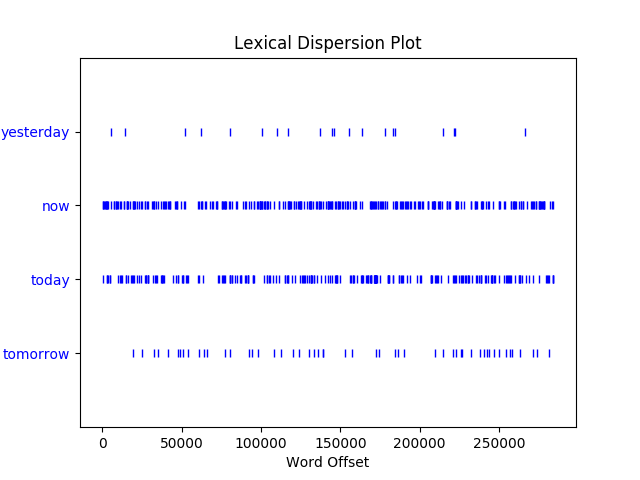

In [23]:
tweets_text.dispersion_plot(["yesterday","now","today","tomorrow"])


In [17]:
# add nltk pos_tag dependency
nltk.download('averaged_perceptron_tagger')

tweets_tagged = nltk.pos_tag(tweets_tokens)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/dharris2/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [20]:
tweets_tagged[0:30]

[('text', 'NN'),
 ('I', 'PRP'),
 ("'m", 'VBP'),
 ('so', 'RB'),
 ('lost', 'VBN'),
 ('RT', 'NNP'),
 ('@', 'NNP'),
 ('allkpop', 'NN'),
 (':', ':'),
 ('Jun.K', 'NNP'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('hot', 'JJ'),
 ('professor', 'NN'),
 ('in', 'IN'),
 ('final', 'JJ'),
 ("'6", 'POS'),
 ('Nights', 'NNS'),
 ("'", 'POS'),
 ('concert', 'NN'),
 ('individual', 'JJ'),
 ('teaser␤https', 'NN'),
 (':', ':'),
 ('//t.co/DHFpBVpko8', 'JJ'),
 ('https', 'NN'),
 (':', ':'),
 ('//t.co/PCKHeoa0jF', 'NN'),
 ('Now', 'RB'),
 ('those', 'DT'),
 ('are', 'VBP')]